In [53]:
'''
read_chains_example.py: an example to read MCMC chains generated by run_mcmc.py.
Y.S.Murakami 2022 @ JHU
With modification to obtain H0 histogram by Gabriele Russo
'''
import numpy as np
import matplotlib.pyplot as plt
import h5py

import sys
import corner
import pygtc
import getdist
from getdist import plots


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))

###### config ######
CHAIN_PATH = '/home/git/AstroCosmoComputational/Students/Gabriele_Russo/ExamProject/final_v2_baseline.h5' 
#this file ^ is currently being uploaded to Zenodo
#in the meantime it is available here https://www.dropbox.com/s/um0oi1xglstii2y/final_v2_baseline.h5.gz?dl=0

BURNIN = 600
####################

# Data is big. Select indices that you are interested in.
idx = [37,38,39,40,41,42,43,45,46]
idx = np.asarray(idx)

# Load data
samples = h5py.File(CHAIN_PATH,'r')['mcmc']['chain'][:,:,idx]

# The loaded chains are raw (=uncut) and you need to apply burnin.
# For the discussion on burnin-size, see Sec. 5.1 (MCMC Sampling) of the SH0ES paper.
samples_burnin = samples[BURNIN:,:,:]

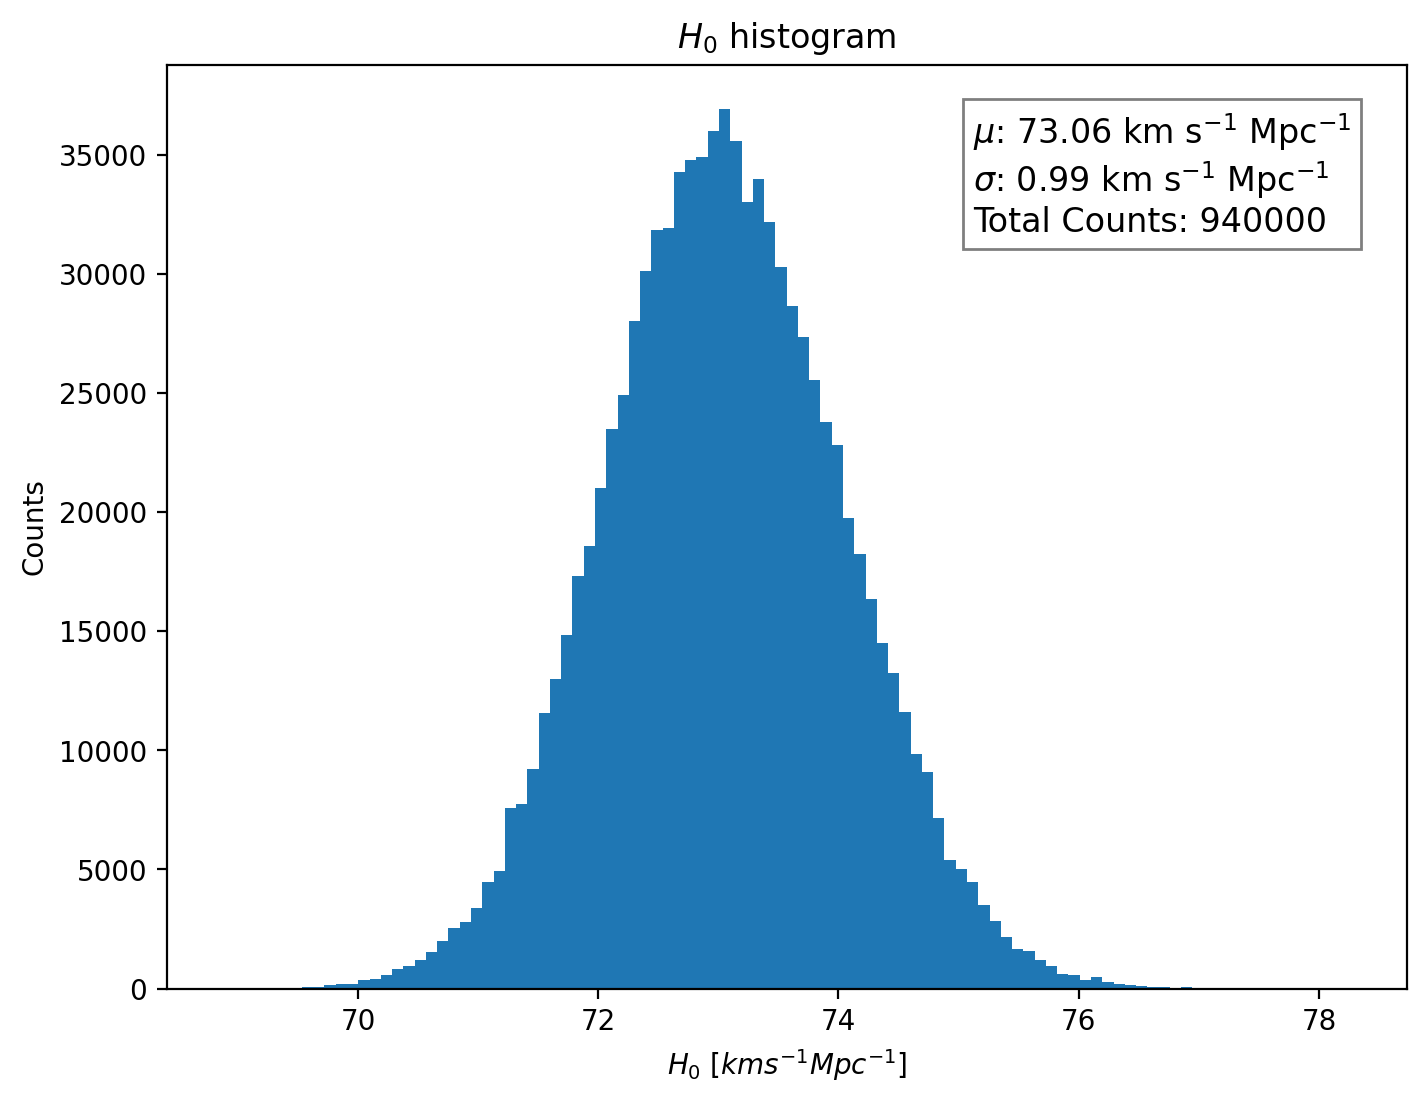

In [54]:
# Once the burnin is applied, one can flatten the chains
# Don't forget to apply formula to obtain the physical quantity.
H0_idx = -1
fivelogH0 = samples_burnin[:,:,H0_idx].flatten()

H0_samples = 10**(fivelogH0/5)

mu_H0 = H0_samples.mean()
std_H0 = H0_samples.std()

# Now it's ready for analyses/plotting!
plt.figure(figsize=(8,6))
counts, bin_edges, _ = plt.hist(H0_samples,bins=100)
total_points = np.sum(counts)

# Text to be plotted
textstr = '\n'.join((
    f'$\mu$: {mu_H0:.2f} km s$^{{-1}}$ Mpc$^{{-1}}$',
    f'$\sigma$: {std_H0:.2f} km s$^{{-1}}$ Mpc$^{{-1}}$',
    f'Total Counts: {int(total_points)}'
))

# Adding text
props = dict(boxstyle='square', facecolor='white', alpha=0.5)
plt.text(0.65, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

plt.title(r'$H_0$ histogram')
plt.xlabel(r'$H_0$ $[km s^{-1} Mpc^{-1}]$')
plt.ylabel('Counts')
plt.show()


In [55]:
'''
# *********************************************#
# OBJECTIVE OF THE FOLLOWING PART OF THE CODE: #
# *********************************************#

This last part of the code, after reproducing the pipeline of MCMC implemented by the SH0ES team,
is aimed at reproducing the plot shown in Figure 14 of the article.
The structure of the plot is freely inspired by Anna D'Ambrosio's file in FinalProject folder.
'''

"\n# *********************************************#\n# OBJECTIVE OF THE FOLLOWING PART OF THE CODE: #\n# *********************************************#\n\nThis last part of the code, after reproducing the pipeline of MCMC implemented by the SH0ES team,\nis aimed at reproducing the plot shown in Figure 14 of the article.\nThe structure of the plot is freely inspired by Anna D'Ambrosio's file in FinalProject folder.\n"

Removed no burn in


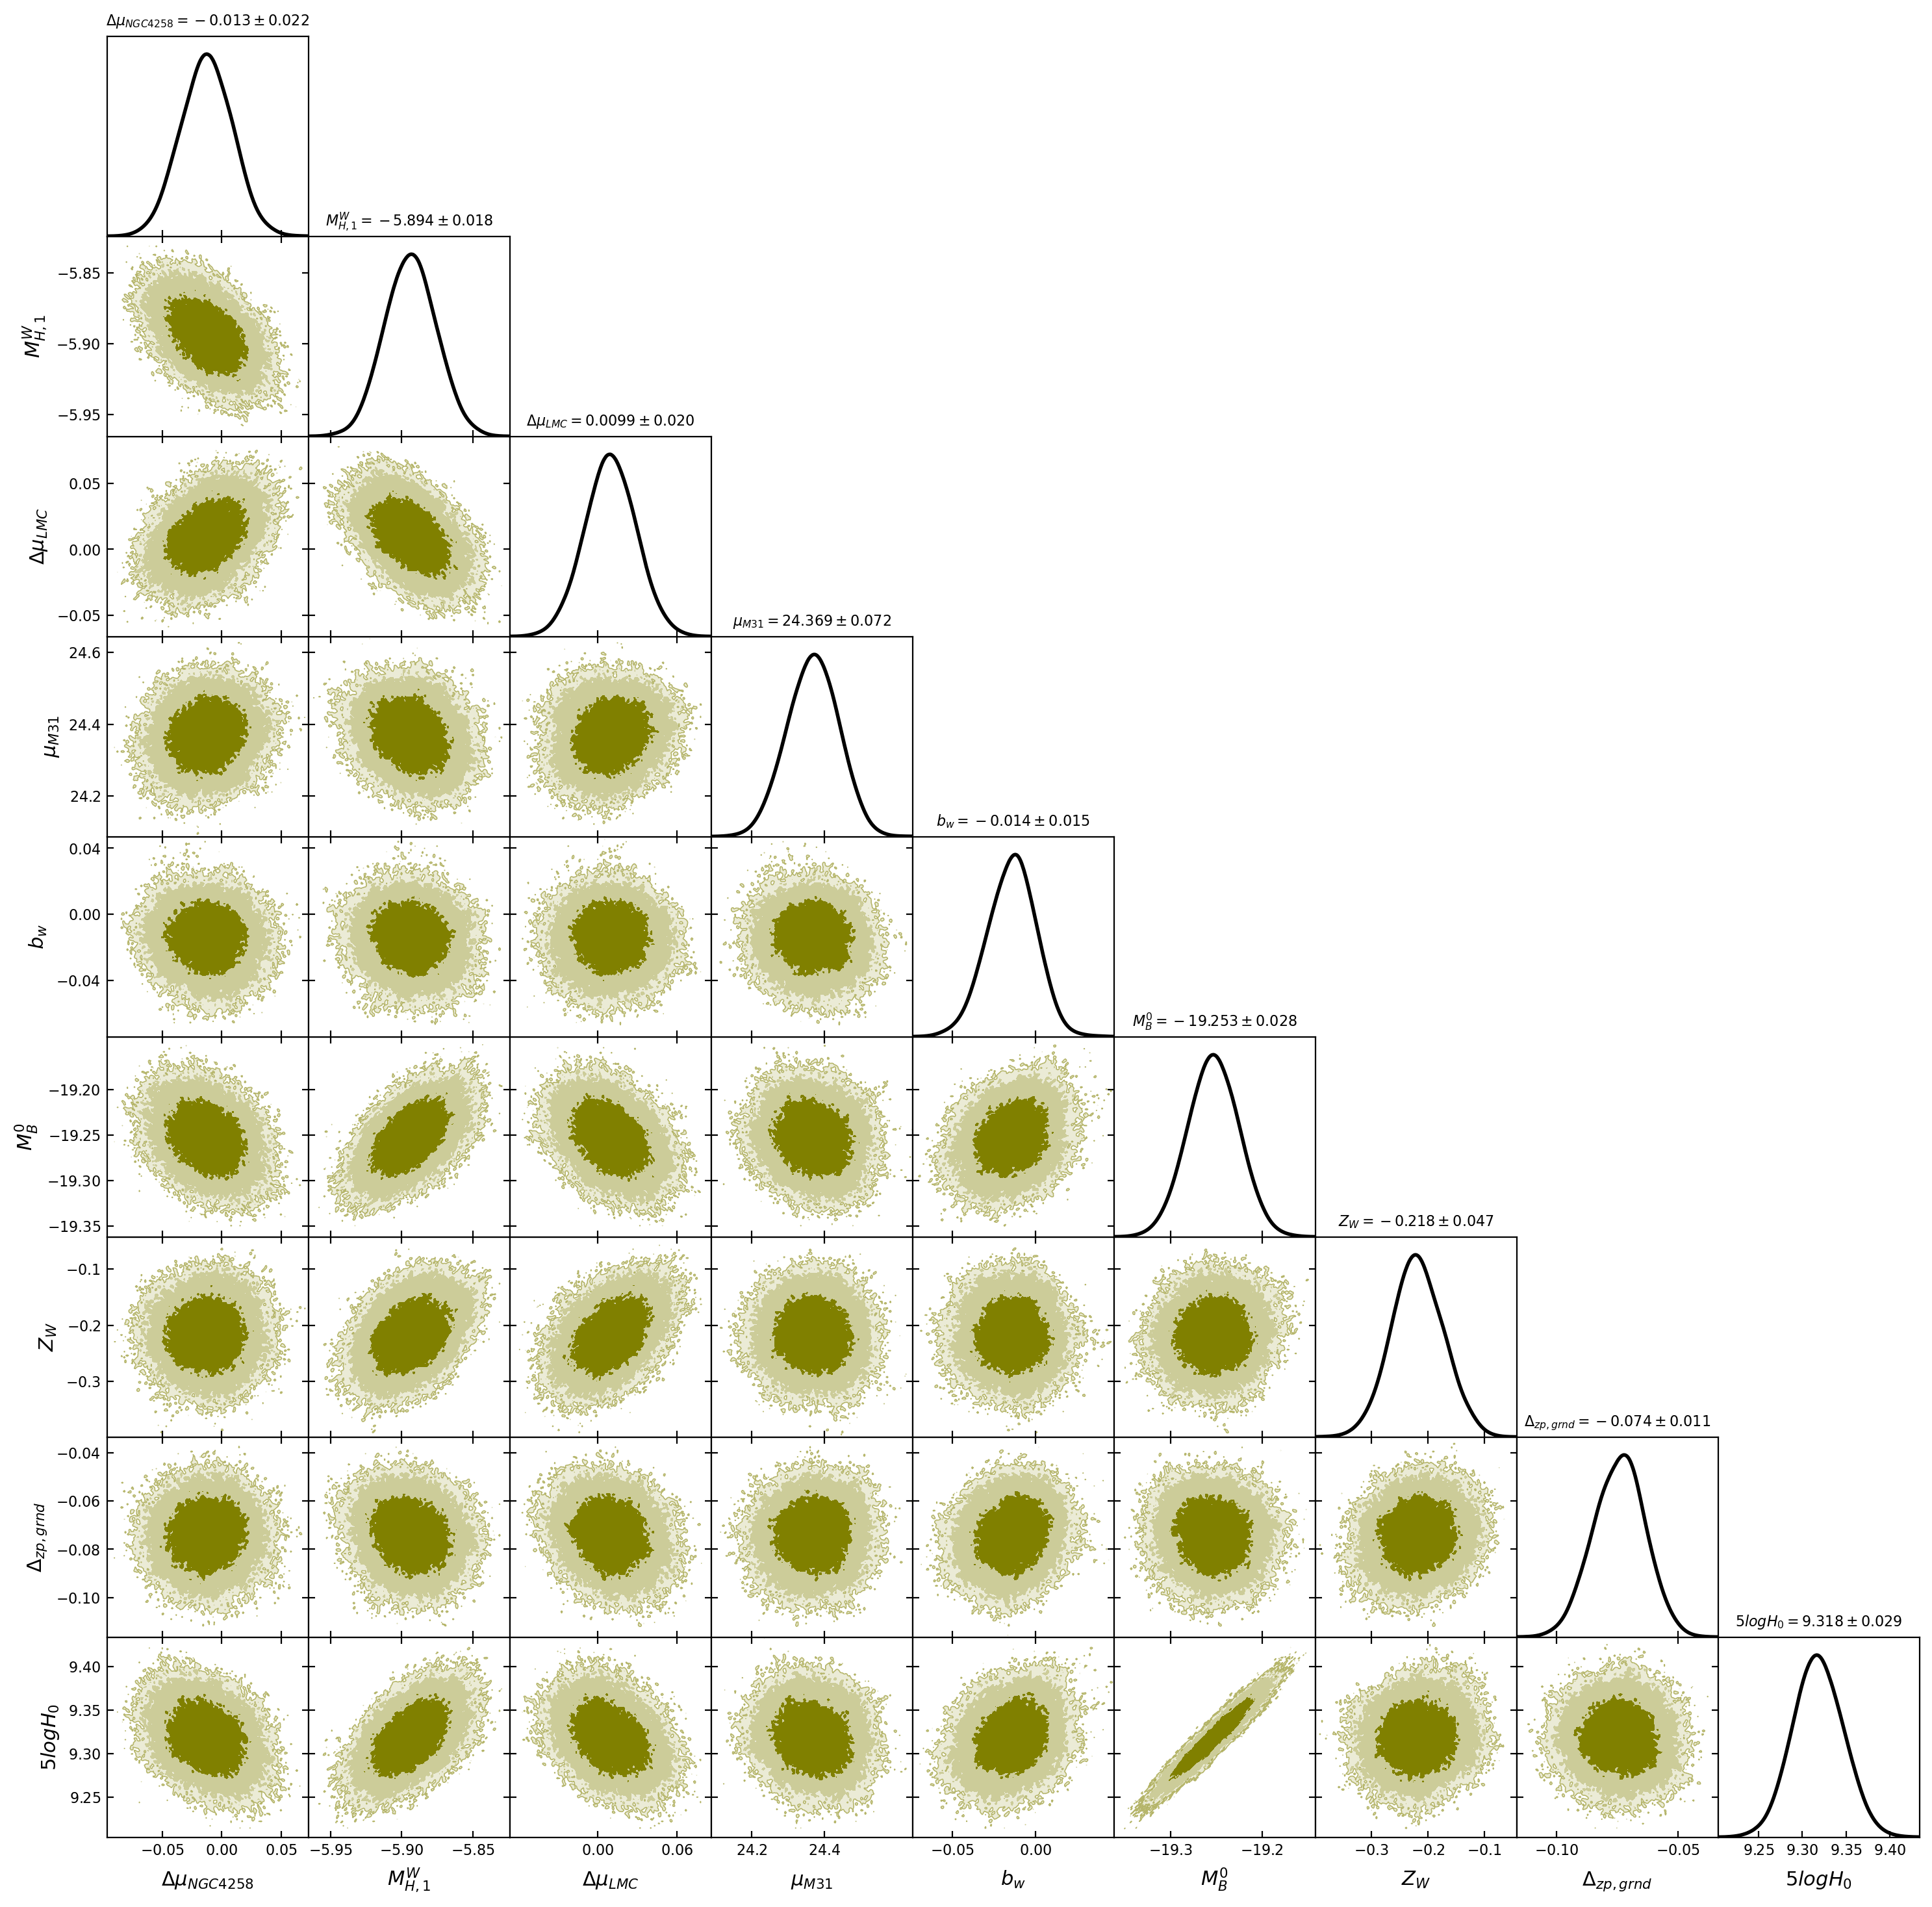

In [56]:
# corner plot
'''
# The loaded chains are raw (=uncut) and you need to apply burnin.
# For the discussion on burnin-size, see Sec. 5.1 (MCMC Sampling) of the SH0ES paper.
samples_burnin = samples[BURNIN:,:,:]

# Once the burnin is applied, one can flatten the chains
# Don't forget to apply formula to obtain the physical quantity.
'''
# Defining all the parameters that will be plotted
H0_idx = -1
fivelogH0 = samples_burnin[:,:,H0_idx].flatten()
zp_idx = 7
deltazp = samples_burnin[:,:,zp_idx].flatten()
Zw_idx = 6
Zw = samples_burnin[:,:,Zw_idx].flatten()
MSN_idx = 5
MSN = samples_burnin[:,:,MSN_idx].flatten()
bw_idx = 4
# Subtract to each entry a constant
bw = samples_burnin[:,:,bw_idx].flatten() - 3.285 
muM31_idx = 3
muM31 = samples_burnin[:,:,muM31_idx].flatten()
muLMC_idx = 2
muLMC = samples_burnin[:,:,muLMC_idx].flatten()
MC_idx = 1
MC = samples_burnin[:,:,MC_idx].flatten()
muNGC4258_idx = 0
muNGC4258 = samples_burnin[:,:,muNGC4258_idx].flatten()

# Defining the mean values of the parameters
mu_fivelogH0 = fivelogH0.mean()
mu_deltazp = deltazp.mean()
mu_Zw = Zw.mean()
mu_MSN = MSN.mean()
mu_bw = bw.mean() 
mu_muM31 = muM31.mean()
mu_muLMC = muLMC.mean()
mu_MC = MC.mean()
mu_muNGC4258 = muNGC4258.mean()


# Plotting the corner plot
names = ["muNGC4258","MC","muLMC","muM31", "bw","MSN", "Zw","deltazp","fivelogH0"]
labels = ["\Delta \mu_{NGC4258}","M_{H,1}^W","\Delta \mu_{LMC}","\mu_{M31}", "b_w","M_B^0", "Z_W","\Delta_{zp, grnd}","5logH_0"]

samples_MCMC = getdist.mcsamples.MCSamples(samples=samples_burnin,names = names, labels = labels)

#g = plots.get_subplot_plotter()
g = plots.getSubplotPlotter()
#g = plots.get_subplot_plotter(subplot_size=2)
#g.settings.figure_legend_frame = False
#g.settings.alpha_filled_add=1.
#g.settings.title_limit_fontsize = 12

g.settings.num_plot_contours = 3

g.triangle_plot(samples_MCMC,
                filled=True,
                line_args={'ls':'-','lw':2, 'color':'black'},
                contour_colors=['olive'],
                contour_ls=['-'],
                legend_loc='upper right',
                title_limit=1, # first title limit (for 1D plots) is 68% by default
                markers={'\Delta \mu_{NGC4258}':[mu_muNGC4258], 'M_{H,1}^W':[mu_MC], 
                         '\Delta \mu_{LMC}':[mu_muLMC], '\mu_{M31}':[mu_muM31], 'b_w':[bw], 
                         'M_B^0':[mu_MSN], 'Z_W':[mu_Zw], '\Delta_{zp, grnd}':[mu_deltazp], 
                         '5logH_0':[mu_fivelogH0]})

plt.show()